# Churn Prediction

Customer attrition or churn, is when customers stop doing business with a company.  It can have a significant impact on a company's revenue and it's crucial for businesses to find out the reasons why customers are leaving and take steps to reduce the number of customers leaving. One way to do this is by identifying customer segments that are at risk of leaving, and implementing retention strategies to keep them. Also, by using data and machine learning techniques, companies can predict which customers are likely to leave in the future and take actions to keep them before they decide to leave.

We are going to build a basic model for predicting customer churn using Telco Customer Churn dataset . We are using some classification algorithm to model customers who have left, using Python tools such as pandas for data manipulation and matplotlib for visualizations.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data split and preprocessing
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, auc, roc_auc_score

# ML algorithem
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# set seed
SEED = 123
# filtering warnings
import warnings
warnings.filterwarnings("ignore")

# clear larg output
from IPython.display import clear_output


In [2]:
# import data set
df_imbalanced = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_imbalanced.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data explanation
1. customerID=========> Customer identification number
2. gender=============> Customer gender
3. SeniorCitizen======> Does the customer is a SeniorCitizen or not? (0: No , 1: Yes)
4. Partner============> Does the customer have partner or not? (0: No , 1: Yes)
5. Dependents=========> Does the customer have partner or not? (0: No , 1: Yes)
6. tenure=============> number of mounths the costomer has stayed with the company
7. PhoneService=======> Does the customer have PhoneService or not? (No , Yes)
8. MultipleLines======> Does the customer have MultipleLines or not? (Yes, No or No phone service)
9. InternetService====> Does the customer have InternetService or not?(Fiber optic, DSL or No )
10. OnlineSecurity====> Does the customer have OnlineSecurity or not? (Yes, No or No internet service)
11. OnlineBackup======> Does the customer have OnlineBackup or not? (Yes, No or No internet service)
12. DeviceProtection==> Does the customer have DeviceProtection or not? (Yes, No or No internet service)
13. TechSupport=======> Does the customer have TechSupport or not? (Yes, No or No internet service)
14. StreamingTV=======> Does the customer have StreamingTV or not? (Yes, No or No internet service)
15. StreamingMovies===> Does the customer have StreamingMovies or not? (Yes, No or No internet service)
16. Contract==========> Types of contract (Month-to-month, Two year, One year)
17. PaperlessBilling==> Does the customer have Paperless Billing or not? (Yes, No)
18. PaymentMethod=====> Types of Payment Method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges====> The amount charged to the customer in monthly
20. TotalCharges======> The total amount charged to the customer
21. Churn=============> Is the customer churned? (Yes, No) ( Traget variable)

In [3]:
df_imbalanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# descriptive of dataset
df_imbalanced.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df_imbalanced.describe(include="O")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### recognize type of features 
[  numeric features  and object (categorical. nominal) features]

In [6]:
df_imbalanced.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df_imbalanced.select_dtypes("O").columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [8]:
# Number of customer churn
df_imbalanced.groupby("Churn").size()

Churn
No     5174
Yes    1869
dtype: int64

In [9]:
# percentage of customer that are leaving
df_imbalanced.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

<AxesSubplot: xlabel='Churn', ylabel='count'>

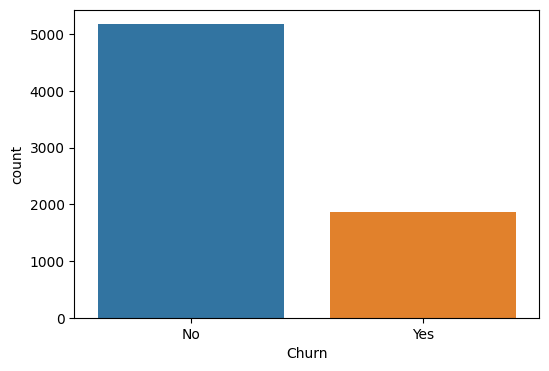

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_imbalanced,x= "Churn")

### You can see that the percentage of leaving for this company is 26%.
Without doing anything special, 74% of customers stay with the company, so we need to build a model that scores higher than 74%

## It has been observed that our target class has an imbalance. 

In [11]:
# Gender of customer
df_imbalanced.groupby("gender").size()

gender
Female    3488
Male      3555
dtype: int64

In [12]:
# Customer churn by gender
df_imbalanced.groupby(["gender","Churn"]).size().reset_index()

,gender,Churn,0
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


<AxesSubplot: xlabel='gender', ylabel='count'>

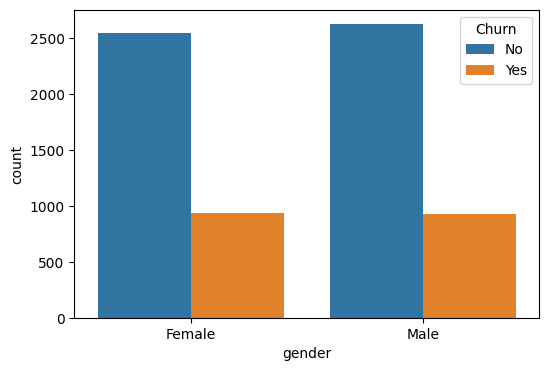

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data = df_imbalanced, x ="gender" ,hue = "Churn")

In [14]:
# churn count for intenet servise
df_imbalanced.groupby(["Churn", "InternetService"]).size()

Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    DSL                 459
       Fiber optic        1297
       No                  113
dtype: int64

<AxesSubplot: xlabel='Churn', ylabel='count'>

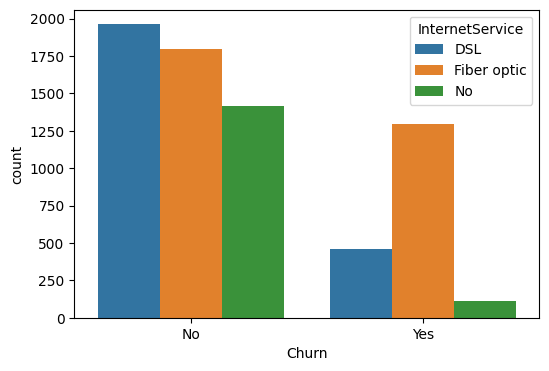

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_imbalanced, x ="Churn" , hue="InternetService")

### Oboservations
1. customer who stay with company almost use DSL.
2. customer who  churn mostly used Fiber Optic.

<AxesSubplot: xlabel='Churn', ylabel='count'>

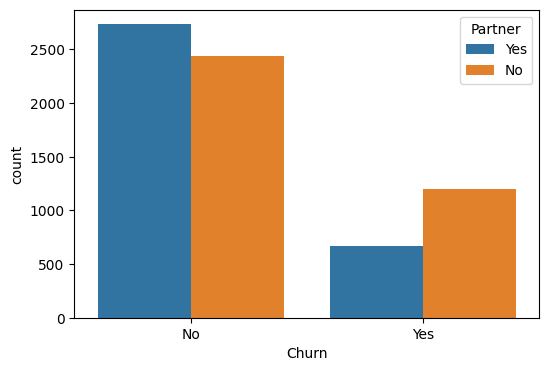

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data = df_imbalanced, x = "Churn", hue = "Partner")

## Observation
1.  The Cuatomer who often left the company almost did not have a partner.

In [17]:
# Distribution of numeric columns for churn

array([<AxesSubplot: title={'center': 'tenure'}>,
       <AxesSubplot: title={'center': 'MonthlyCharges'}>], dtype=object)

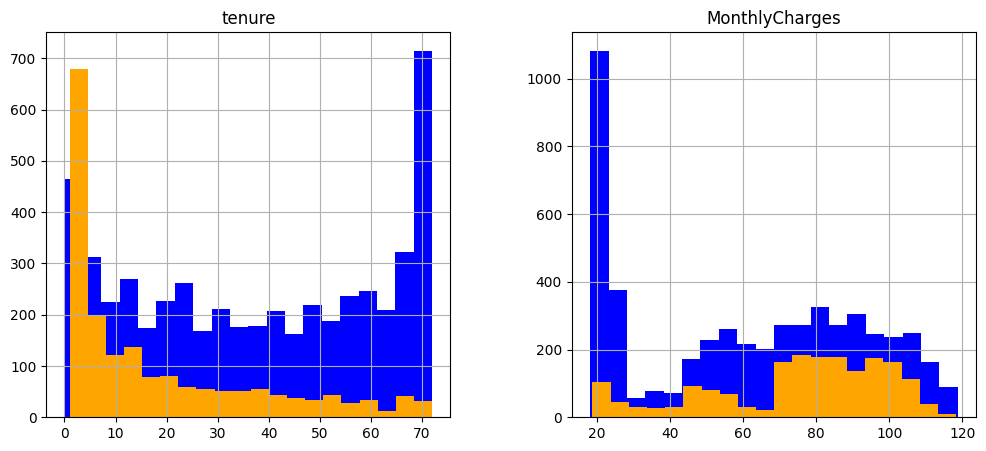

In [18]:
num_features = ["tenure", "MonthlyCharges"]
fig, ax = plt.subplots(1 , 2, figsize= (12,5))
df_imbalanced[df_imbalanced["Churn"]=="No"][num_features].hist(bins= 20, color = "blue", ax= ax)
df_imbalanced[df_imbalanced["Churn"]=="Yes"][num_features].hist(bins= 20, color = "orange", ax= ax)

### Observation 
#### The result shows that churn customers end up leaving the company up to 10 months later, and they often pay less than 100 dollar a month.

<AxesSubplot: xlabel='Churn', ylabel='count'>

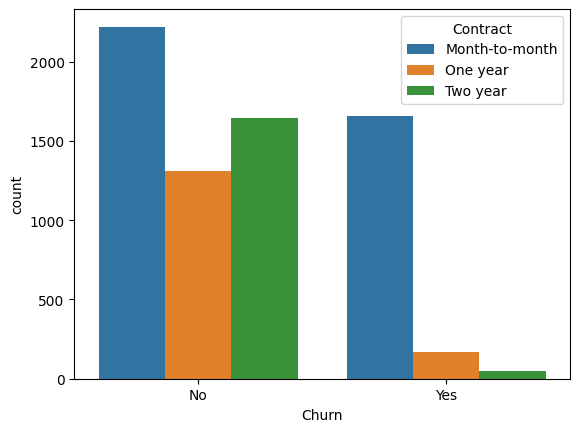

In [19]:
# Churn count for Contract types
sns.countplot(data=df_imbalanced, x= "Churn" , hue = "Contract")

## Data preprocessing

In [20]:
# remove unnecessary coulmns
df_imbalanced.drop("customerID", axis=1, inplace=True)

In [21]:
# checking  null values
df_imbalanced.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df_imbalanced["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [23]:
### There are 11 values in the Totalcharges that have ' ', so we reaplace it with np.NaN

In [24]:
df_imbalanced["TotalCharges"]=df_imbalanced["TotalCharges"].replace(' ',np.NaN)

In [25]:
df_imbalanced.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [26]:
df_imbalanced["TotalCharges"] = df_imbalanced["TotalCharges"].fillna(df_imbalanced["TotalCharges"].median())

In [27]:
df_imbalanced.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
df_imbalanced["TotalCharges"] = df_imbalanced["TotalCharges"].astype("float64")

In [29]:
# Convert all of the non-numeric to numeric
for column in df_imbalanced.columns:
    if df_imbalanced[column].dtypes == np.number:
        continue
    df_imbalanced[column] = LabelEncoder().fit_transform(df_imbalanced[column])

In [30]:
df_imbalanced.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [31]:
df_imbalanced.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [32]:
df_copy = df_imbalanced.copy()

In [33]:
X = df_copy.drop("Churn", axis=1)
y = df_copy["Churn"]

## Handeling imbalanced Datasets

### As seen, our target variable has imbalance. Therefore, we must solve this problem

SMOTE is one of technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=SEED)

In [36]:
# Fit the model to generate the data.
X_sm, y_sm = sm.fit_resample(X, y)

In [37]:
df = pd.concat([pd.DataFrame(X_sm), pd.DataFrame(y_sm)], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [38]:
df.shape

(10348, 20)

In [39]:
df.Churn.value_counts(normalize=True)

0    0.5
1    0.5
Name: Churn, dtype: float64

In [40]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [41]:
# Scaling the data set
st = StandardScaler()
df_st = st.fit_transform(X)

In [42]:
# Scaling the data set
scale_col = ["tenure", "MonthlyCharges", "TotalCharges"]
norm = Normalizer()
df[scale_col] = norm.fit_transform(df[scale_col])

In [43]:
X = pd.DataFrame(df_st)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.873076,-0.39995,1.290329,-0.523667,-1.109340,-2.969484,0.095320,-1.246539,-0.753230,1.445285,-0.893623,-0.762387,-1.032258,-1.038461,-0.640099,0.833336,0.445942,-1.333860,-0.923346
1,1.145376,-0.39995,-0.774996,-0.523667,0.271362,0.336759,-0.983858,-1.246539,1.729862,-0.886278,1.444483,-0.762387,-1.032258,-1.038461,0.672574,-1.199996,1.449991,-0.387344,-0.065655
2,1.145376,-0.39995,-0.774996,-0.523667,-1.067500,0.336759,-0.983858,-1.246539,1.729862,1.445285,-0.893623,-0.762387,-1.032258,-1.038461,-0.640099,0.833336,1.449991,-0.495617,-0.887233
3,1.145376,-0.39995,-0.774996,-0.523667,0.731596,-2.969484,0.095320,-1.246539,1.729862,-0.886278,1.444483,1.707613,-1.032258,-1.038461,0.672574,-1.199996,-1.562155,-0.899021,-0.088139
4,-0.873076,-0.39995,-0.774996,-0.523667,-1.067500,0.336759,-0.983858,0.233404,-0.753230,-0.886278,-0.893623,-0.762387,-1.032258,-1.038461,-0.640099,0.833336,0.445942,0.092900,-0.867170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1.145376,-0.39995,1.290329,-0.523667,-0.941982,0.336759,1.174497,0.233404,-0.753230,1.445285,-0.893623,-0.762387,-1.032258,-1.038461,-0.640099,0.833336,0.445942,0.433778,-0.745749
10344,-0.873076,-0.39995,-0.774996,-0.523667,-1.025661,0.336759,-0.983858,0.233404,-0.753230,-0.886278,-0.893623,-0.762387,0.095228,-1.038461,-0.640099,-1.199996,-0.558107,0.355682,-0.813339
10345,-0.873076,-0.39995,1.290329,-0.523667,-0.398069,0.336759,0.095320,0.233404,0.488316,-0.886278,0.275430,-0.762387,-1.032258,-1.038461,-0.640099,0.833336,-1.562155,0.414169,-0.260889
10346,-0.873076,-0.39995,-0.774996,-0.523667,0.145844,0.336759,1.174497,0.233404,-0.753230,-0.886278,-0.893623,-0.762387,-1.032258,0.086421,-0.640099,-1.199996,-0.558107,0.719367,0.331806


In [44]:
df = df_st.copy()

In [45]:
# Data split

In [46]:
X_train, X_val , y_train , y_val = train_test_split(X, y , train_size=0.8 , random_state=SEED)
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=SEED)

## Logestic regression

In [47]:
logr = LogisticRegression(random_state=SEED)
cv = cross_validate(logr , X_train, y_train, cv =skf , scoring="accuracy", return_estimator=True)
model_logr = cv["estimator"]

In [48]:
y_hats = [model.predict(X_val) for model in model_logr]
y_hats
acc_log = np.mean([accuracy_score(y_hat, y_val) for y_hat in y_hats])
print( "accuracy of Logestic regression is :" f'{acc_log:0.2%}' )

accuracy of Logestic regression is :80.06%


## Light Gradiant Boosting Model

In [49]:
lgbm = LGBMClassifier(random_state=SEED)
cv = cross_validate(lgbm , X_train, y_train, cv =skf , scoring="accuracy", return_estimator=True)
model_lgbm = cv["estimator"]

In [50]:
y_hats = [model.predict(X_val) for model in model_lgbm]
acc_lgbm = np.mean([accuracy_score(y_hat, y_val) for y_hat in y_hats])
print( "accuracy of LGBM is :",f'{acc_lgbm:0.2%}' )

accuracy of LGBM is : 84.08%


## eXterme Gradiant Boosting

In [51]:
xgb  = XGBClassifier(random_state=SEED)
cv = cross_validate(xgb, X_train, y_train, cv =skf , scoring="accuracy", return_estimator=True)
model_xgb = cv["estimator"]

In [52]:
y_hats = [model.predict(X_val) for model in model_xgb]
acc_xgb = np.mean([accuracy_score(y_hat, y_val) for y_hat in y_hats])
print( "accuracy of XGB is :",f'{acc_xgb:0.2%}' )

accuracy of XGB is : 83.93%


## CatBoost

In [53]:
cat = CatBoostClassifier(random_state=SEED)
cv = cross_validate(cat, X_train, y_train, cv =skf , scoring="accuracy", return_estimator=True)
model_cat = cv["estimator"]
clear_output(wait=False)

In [54]:
y_hats = [model.predict(X_val) for model in model_cat]
acc_cat = np.mean([accuracy_score(y_hat, y_val) for y_hat in y_hats])
print( "accuracy of CatBoost is :"f'{acc_cat:0.2%}')

accuracy of CatBoost is :84.42%


## ExtraTree

In [55]:
extree = ExtraTreesClassifier(random_state=SEED)
cv = cross_validate(extree, X_train, y_train, cv =skf , scoring="accuracy", return_estimator=True)
model_extree = cv["estimator"]

In [56]:
y_hats = [model.predict(X_val) for model in model_extree]
acc_xtree = np.mean([accuracy_score(y_hat, y_val) for y_hat in y_hats])
print( "accuracy of extree is :"f'{acc_xtree:0.2%}' )

accuracy of extree is :83.17%


## RandomForest

In [57]:
rf = RandomForestClassifier()
cv = cross_validate(rf, X_train, y_train, cv =skf , scoring="accuracy", return_estimator=True)
model_rf = cv["estimator"]

In [58]:
y_hats = [model.predict(X_val) for model in model_rf]
acc_rf = np.mean([accuracy_score(y_hat, y_val) for y_hat in y_hats])
print( "accuracy of RandomForest is :"f'{acc_rf:0.2%}' )

accuracy of RandomForest is :84.67%


## Gradiant Boosting

In [59]:
gbm = GradientBoostingClassifier(random_state=SEED)
cv = cross_validate(gbm, X_train, y_train, cv =skf , scoring="accuracy", return_estimator=True)
model_gbm = cv["estimator"]

In [60]:
y_hats = [model.predict(X_val) for model in model_gbm]
acc_gbm = np.mean([accuracy_score(y_hat, y_val) for y_hat in y_hats])
print( "accuracy of Gradiant Boosting is: "f'{acc_gbm:0.2%}' )

accuracy of Gradiant Boosting is: 82.68%


## The Results

In [61]:
print( "accuracy of Logestic regression is:" f'{acc_log:0.2%}')
print( "accuracy of LGBM is:" f'{acc_lgbm:0.2%}')
print( "accuracy of CatBoost is: "f'{acc_cat:0.2%}')
print( "accuracy of extree is: "f'{acc_xtree:0.2%}')
print( "accuracy of RandomForest is: "f'{acc_rf:0.2%}')
print( "accuracy of Gradiant Boosting is: "f'{acc_gbm:0.2%}')

accuracy of Logestic regression is:80.06%
accuracy of LGBM is:84.08%
accuracy of CatBoost is: 84.42%
accuracy of extree is: 83.17%
accuracy of RandomForest is: 84.67%
accuracy of Gradiant Boosting is: 82.68%
